In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import scipy
import scipy.spatial.distance
import simplejson

import pandas as pd
from scipy import stats, integrate

from pyannote.core import Annotation,Segment, Timeline
from pyannote.metrics.diarization import GreedyDiarizationErrorRate,DiarizationErrorRate
from pyannote.metrics.diarization import DiarizationPurityCoverageFMeasure,DiarizationPurity,DiarizationCoverage

from pyannote.database import get_protocol
from pyannote.audio.features import Precomputed

In [30]:
import clustering

In [5]:
protocol = get_protocol('Etape.SpeakerDiarization.TV')
#score_precomputed = Precomputed('/people/yin/projects/clustering/diarization_baseline/vad/train/Etape.SpeakerDiarization.TV.train/tune/Etape.SpeakerDiarization.TV.development/apply')
embedding_precomputed = Precomputed('/vol/work1/yin/clustering/ClopiNet_cosine_0.1_internal')

In [55]:
for item in protocol.development():
    uri = item['uri']
    item_timeline=item['annotation'].get_timeline()
    embedding = embedding_precomputed(item)
    hier = clustering.HierarchicalClustering(uri, stop_threshold = 0.5)
    X = []
    for one_timeline in item_timeline:
        # seg_embedding is not normalized
        seg_embedding = embedding.crop(one_timeline)
        X.append((seg_embedding,one_timeline))
        
    hier.fit(X)
    break

In [56]:
hier.min_dist

array([[ 0.50681933]])

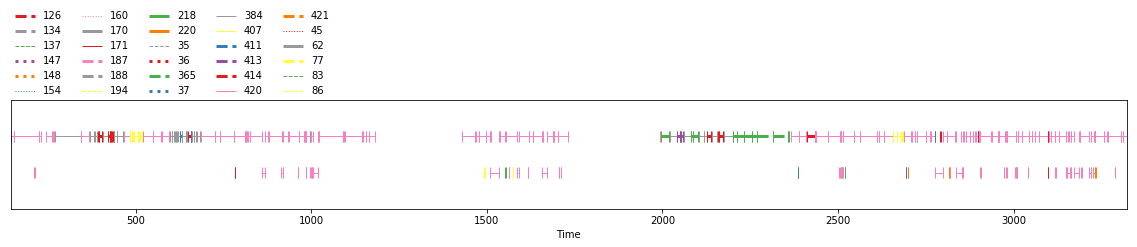

In [57]:
hier.getAnnotations()

In [50]:
hier.getLabels()

[35,
 36,
 37,
 45,
 62,
 77,
 83,
 86,
 126,
 134,
 137,
 147,
 148,
 154,
 160,
 170,
 171,
 187,
 188,
 194,
 218,
 220,
 365,
 384,
 407,
 411,
 413,
 414,
 420,
 421]

In [58]:
hier.tree

[(-1, -1, 0, 0),
 (-1, -1, 1, 0),
 (-1, -1, 2, 0),
 (-1, -1, 3, 0),
 (-1, -1, 4, 0),
 (-1, -1, 5, 0),
 (-1, -1, 6, 0),
 (-1, -1, 7, 0),
 (-1, -1, 8, 0),
 (-1, -1, 9, 0),
 (-1, -1, 10, 0),
 (-1, -1, 11, 0),
 (-1, -1, 12, 0),
 (-1, -1, 13, 0),
 (-1, -1, 14, 0),
 (-1, -1, 15, 0),
 (-1, -1, 16, 0),
 (-1, -1, 17, 0),
 (-1, -1, 18, 0),
 (-1, -1, 19, 0),
 (-1, -1, 20, 0),
 (-1, -1, 21, 0),
 (-1, -1, 22, 0),
 (-1, -1, 23, 0),
 (-1, -1, 24, 0),
 (-1, -1, 25, 0),
 (-1, -1, 26, 0),
 (-1, -1, 27, 0),
 (-1, -1, 28, 0),
 (-1, -1, 29, 0),
 (-1, -1, 30, 0),
 (-1, -1, 31, 0),
 (-1, -1, 32, 0),
 (-1, -1, 33, 0),
 (-1, -1, 34, 0),
 (-1, -1, 35, 0),
 (-1, -1, 36, 0),
 (-1, -1, 37, 0),
 (-1, -1, 38, 0),
 (-1, -1, 39, 0),
 (-1, -1, 40, 0),
 (-1, -1, 41, 0),
 (-1, -1, 42, 0),
 (-1, -1, 43, 0),
 (-1, -1, 44, 0),
 (-1, -1, 45, 0),
 (-1, -1, 46, 0),
 (-1, -1, 47, 0),
 (-1, -1, 48, 0),
 (-1, -1, 49, 0),
 (-1, -1, 50, 0),
 (-1, -1, 51, 0),
 (-1, -1, 52, 0),
 (-1, -1, 53, 0),
 (-1, -1, 54, 0),
 (-1, -1, 55, 0),
 (